<a href="https://colab.research.google.com/github/nandanajayachandran/NANDANA_J_ICT_ASSIGNMENTS_CASE_STUDIES/blob/main/Nandana_J_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ASSIGNMENT:-1 SUPERVISED LEARNING**

In [396]:
#Importing Libraries
import pandas as pd

In [397]:
# Loading the dataset
df = pd.read_csv('/content/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [398]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [399]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [400]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [401]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**No NaN values present in the dataset.**

**IMPUTATION**

**Handling the Zeros in the dataset as they are treated as NaN values**

In [402]:
# Finding columns with zero values
no_of_columns = df.eq(0).sum()
column_zeros = no_of_columns[no_of_columns > 0]
print(column_zeros)

Pregnancies      111
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
Outcome          500
dtype: int64


These Columns contain zeros

In [403]:
# Impute zeros values with the mean values
for column in column_zeros.index:
  df[column] = df[column].replace(0, df[column].median())
  print(column)


Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
Outcome


In [404]:
# Checking whether the columns with zeros are replaced
no_of_columns = df.eq(0).sum()
column_zeros = no_of_columns[no_of_columns> 0]
print(column_zeros)

Outcome    500
dtype: int64


**The columns with zero values are replaced**

**HANDLING OUTLIERS**

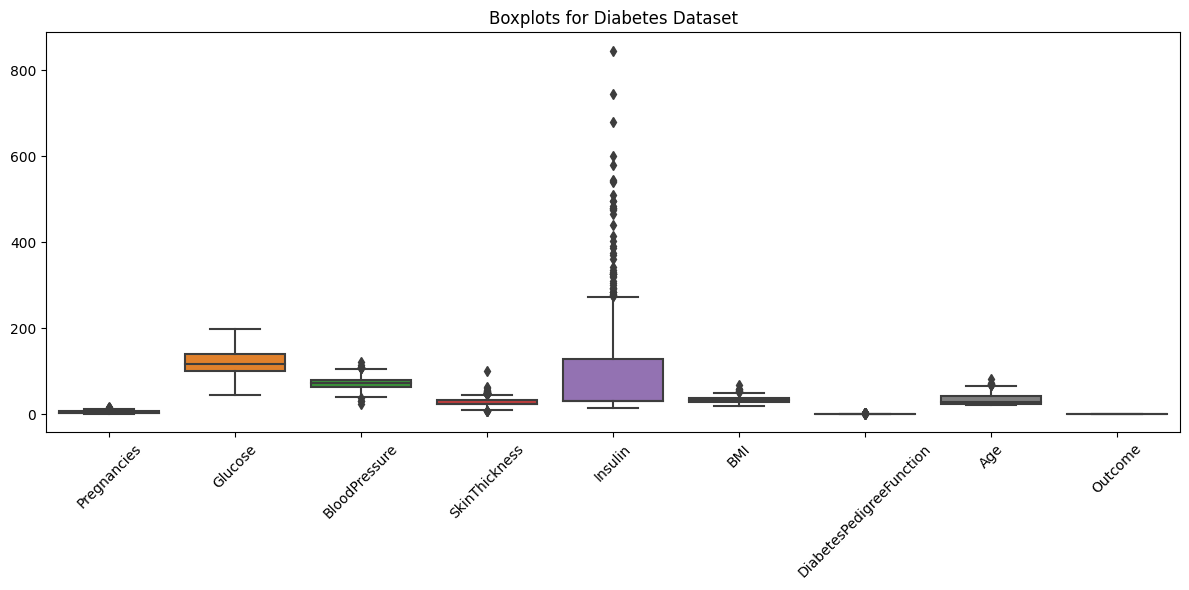

In [405]:
#Boxplot
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
plt.title("Boxplots for Diabetes Dataset")
# Creating box plot
sns.boxplot(df)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Outliers are present in Pregnancies,BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction and age columns**

**Glucose Column**

Number of outliers in Pregnancies is 14


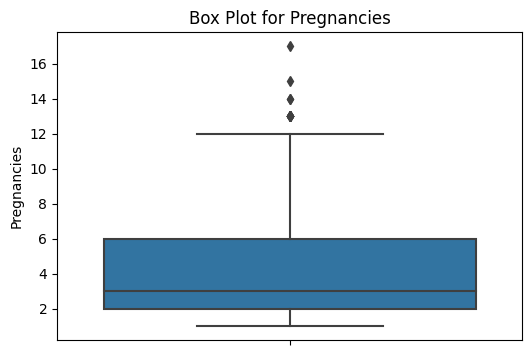

In [406]:
# Glucose Column
plt.figure(figsize=(6, 4))
sns.boxplot(df, y='Pregnancies')
plt.title("Box Plot for Pregnancies")

# Calculate the IQR
Q1 = df['Pregnancies'].quantile(0.25)
Q3 = df['Pregnancies'].quantile(0.75)
IQR = Q3 - Q1

# Defining the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Detecting the outliers and getting its count
outliers = df[(df['Pregnancies'] < lower_bound) | (df['Pregnancies'] > upper_bound)]
out_n = len(outliers)
print(f"Number of outliers in Pregnancies is {out_n}")

**Capping**

Text(0.5, 1.0, 'Box Plot for Pregnancies')

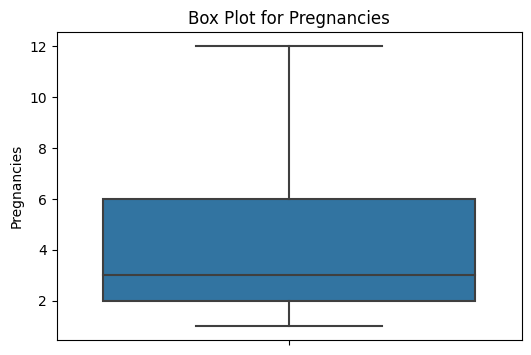

In [407]:
#handle outliers
df['Pregnancies'] = df['Pregnancies'].clip(upper=upper_bound)
plt.figure(figsize=(6, 4))
sns.boxplot(df, y='Pregnancies')
plt.title("Box Plot for Pregnancies")

**BloodPressure**

Number of outliers in BloodPressure is 14


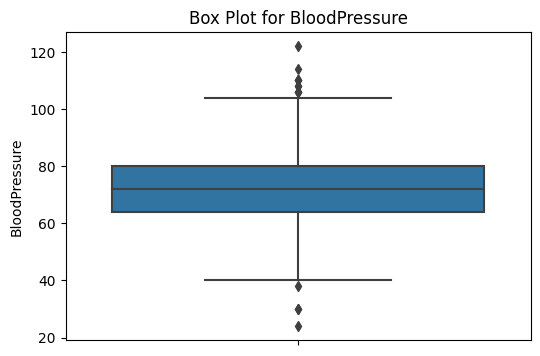

In [408]:
#BloodPressure column
plt.figure(figsize=(6, 4))
sns.boxplot(df, y='BloodPressure')
plt.title("Box Plot for BloodPressure")

# Calculate the IQR
Q1 = df['BloodPressure'].quantile(0.25)
Q3 = df['BloodPressure'].quantile(0.75)
IQR = Q3 - Q1

# Defining the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Detecting the outliers and getting its count
outliers = df[(df['BloodPressure'] < lower_bound) | (df['BloodPressure'] > upper_bound)]
out_n = len(outliers)
print(f"Number of outliers in BloodPressure is {out_n}")

**Flooring and Capping**

Text(0.5, 1.0, 'BloodPressure')

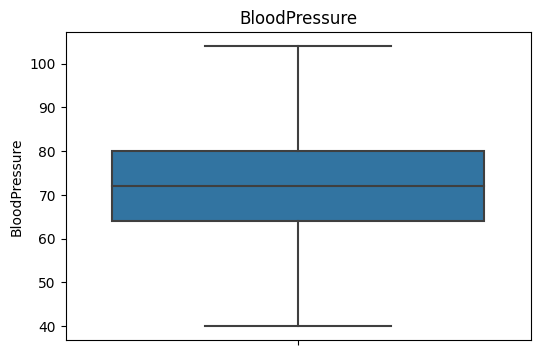

In [409]:
#handle outliers
df['BloodPressure'] = df['BloodPressure'].clip(lower= lower_bound,upper=upper_bound)
plt.figure(figsize=(6, 4))
sns.boxplot(df, y='BloodPressure')
plt.title("BloodPressure")

**SkinThickness**

Number of outliers in SkinThickness is 35


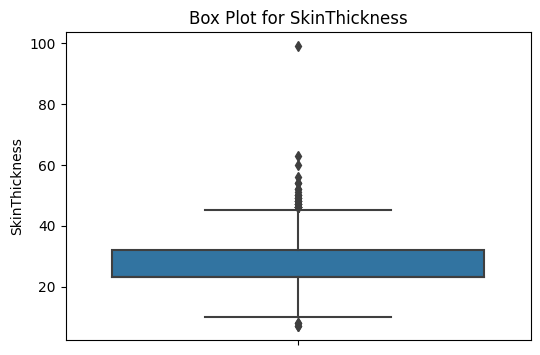

In [410]:
#SkinThickness column
plt.figure(figsize=(6, 4))
sns.boxplot(df, y='SkinThickness')
plt.title("Box Plot for SkinThickness")

# Calculate the IQR
Q1 = df['SkinThickness'].quantile(0.25)
Q3 = df['SkinThickness'].quantile(0.75)
IQR = Q3 - Q1

# Defining the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Detecting the outliers and getting its count
outliers = df[(df['SkinThickness'] < lower_bound) | (df['SkinThickness'] > upper_bound)]
out_n = len(outliers)
print(f"Number of outliers in SkinThickness is {out_n}")

**Capping**

Text(0.5, 1.0, 'Box Plot for SkinThickness')

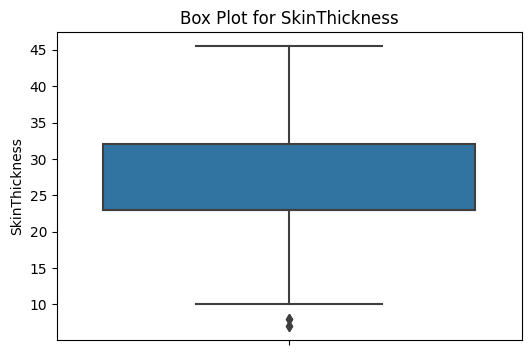

In [411]:
#handle outliers
df['SkinThickness'] = df['SkinThickness'].clip(upper=upper_bound)
plt.figure(figsize=(6, 4))
sns.boxplot(df, y='SkinThickness')
plt.title("Box Plot for SkinThickness")

**Insulin**

Number of outliers in Insulin is 49


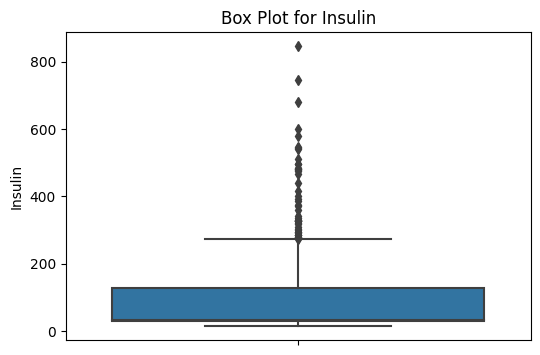

In [412]:
#Insulin column
plt.figure(figsize=(6, 4))
sns.boxplot(df, y='Insulin')
plt.title("Box Plot for Insulin")

# Calculate the IQR
Q1 = df['Insulin'].quantile(0.25)
Q3 = df['Insulin'].quantile(0.75)
IQR = Q3 - Q1

# Defining the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Detecting the outliers and getting its count
outliers = df[(df['Insulin'] < lower_bound) | (df['Insulin'] > upper_bound)]
out_n = len(outliers)
print(f"Number of outliers in Insulin is {out_n}")

**Capping**

Text(0.5, 1.0, 'Box Plot for Insulin')

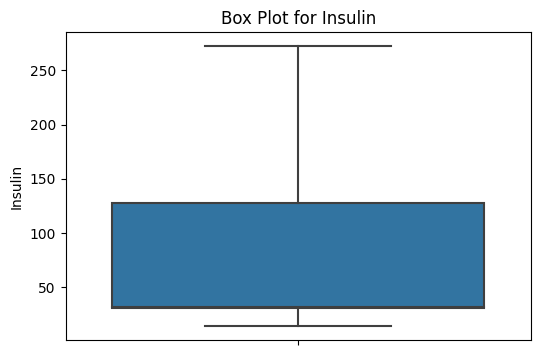

In [413]:
#handle outliers
df['Insulin'] = df['Insulin'].clip(upper=upper_bound)
plt.figure(figsize=(6, 4))
sns.boxplot(df, y='Insulin')
plt.title("Box Plot for Insulin")

**BMI**

Number of outliers in BMI is 8


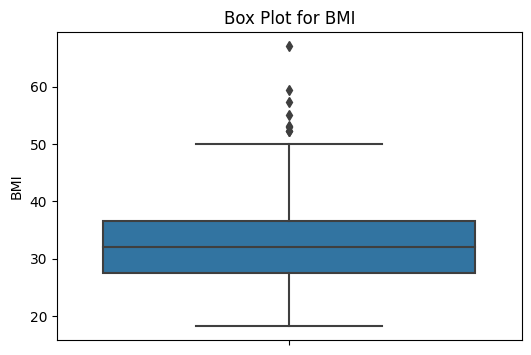

In [414]:
#BMI column
plt.figure(figsize=(6, 4))
sns.boxplot(df, y='BMI')
plt.title("Box Plot for BMI")

# Calculate the IQR
Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)
IQR = Q3 - Q1

# Defining the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Detecting the outliers and getting its count
outliers = df[(df['BMI'] < lower_bound) | (df['BMI'] > upper_bound)]
out_n = len(outliers)
print(f"Number of outliers in BMI is {out_n}")

**Capping**

Text(0.5, 1.0, 'Box Plot for BMI')

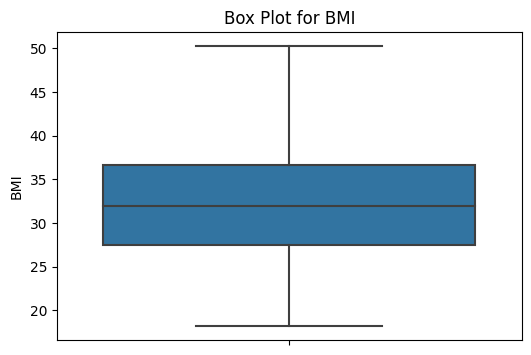

In [415]:
#handle outliers
df['BMI'] = df['BMI'].clip(upper=upper_bound)
plt.figure(figsize=(6, 4))
sns.boxplot(df, y='BMI')
plt.title("Box Plot for BMI")

**Age**

Number of outliers in Age is 9


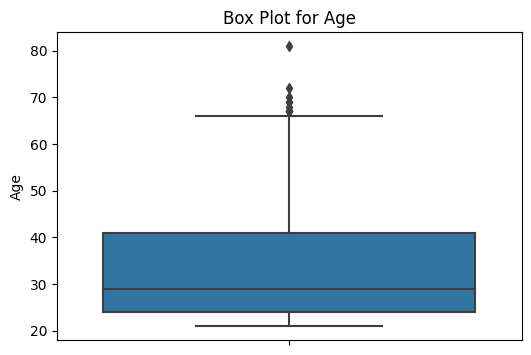

In [416]:
#Age column
plt.figure(figsize=(6, 4))
sns.boxplot(df, y='Age')
plt.title("Box Plot for Age")

# Calculate the IQR
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

# Defining the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Detecting the outliers and getting its count
outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]
out_n = len(outliers)
print(f"Number of outliers in Age is {out_n}")

Text(0.5, 1.0, 'Box Plot for Age')

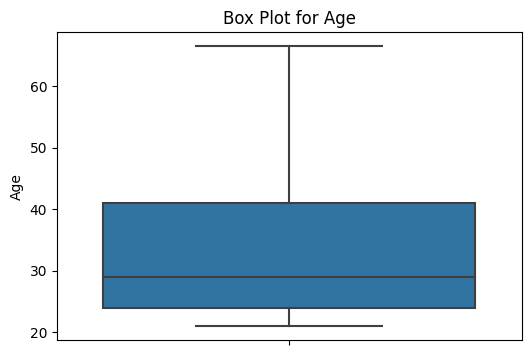

In [417]:
#handle outliers
df['Age'] = df['Age'].clip(upper=upper_bound)
plt.figure(figsize=(6, 4))
sns.boxplot(df, y='Age')
plt.title("Box Plot for Age")

**The outliers are Handled**

In [418]:
# Splitting the data into features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [419]:
from sklearn.model_selection import train_test_split
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Standard Scaling**

In [420]:
from sklearn.preprocessing import StandardScaler
#Scaling using standard scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**LABEL ENCODING**

In [421]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)


**LOGISTIC REGRESSION**

In [422]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
#logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [423]:
#Predictions
y_predlr = model.predict(X_test)

In [424]:
accuracy_score(y_test,y_predlr)

0.7662337662337663

**K-Nearest Neighbors (KNN)**

In [425]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [426]:
#Predictions
y_predknn = model.predict(X_test)

In [427]:
accuracy_score(y_test,y_predknn)

0.7662337662337663

**Naive - Bayes (NB)**

In [428]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [429]:
#Predictions
y_prednb = model.predict(X_test)

In [430]:
accuracy_score(y_test,y_prednb)

0.7662337662337663

**Support Vector Machine (SVM)**

In [431]:
from sklearn.svm import SVC
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [432]:
#Predictions
y_predsvm = model.predict(X_test)

In [433]:
accuracy_score(y_test,y_predsvm)

0.7662337662337663

Sumitted by,
Nandana J.
ML-AI